

## Изучение данных e-commerce: проведение когортного анализа и сегментирования покупателей

### Изучение данных: 
1. Наличие NULL значений:
 - customers - нет;
 - order_items - нет;
 - orders: 
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965

2. Для решения задач принимаем, что покупкой считается только доставленный товар. Статус заказа: delivered. Данное решение принято, в связи с тем, что на других этапах оформления заказа, до получения, пользователь может отказаться от совершения покупки, либо фактической передачи товара не произойдет. Как видно из данных о заказах: у нас появляются не подтвержденные заказы, не переданные курьеру, и не доставленные.

3. Период в рассматриваемых данных: 
    2016-09-04 - 2018-10-17 (772 days).

__Загрузка .csv в DataFrame Pandas с Яндекс диска без авторизации.__ 
1. Создаем лист, где указываем названия таблиц и открытые ссылки на них. 
2. Создаем цикл для выгрузки каждой таблицы из листа и присваиваем имя.

In [1]:
import pandas as pd
import requests
import urllib
import json

from datetime import datetime
from datetime import timedelta
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
from urllib.parse import urlencode
tables = [['customers', 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg'],
         ['orders', 'https://disk.yandex.ru/d/0zWmh1bYP6REbw'],
         ['order_items', 'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg']]

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
#создаем цикл для выгрузки каждой таблицы из tables
for i in tables:
    public_key = i[1]
    table_name = i[0]
    # Получаем загрузочную ссылку
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']


    #Загрузка данных в DataFrame и присваивание имени таблицы:
    locals()[f"{table_name}"] = pd.read_csv(download_url, sep=',', error_bad_lines=False, comment='#' , encoding='cp1251')
    

__Проверяем данные:__
1. Все таблицы выгрузились; 
2. Имена присвоены верно;
3. Столбцы с датами и временем требуют изменения формата

In [3]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [4]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [5]:
customers.customer_state.nunique()

27

In [6]:
customers.customer_city.nunique()

4119

In [7]:
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


__Преобразовываем формат необходимых столбцов во всех таблицах в формат DateTime__

In [8]:
orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].apply (pd.to_datetime )
order_items[['shipping_limit_date']] = order_items[['shipping_limit_date']].apply (pd.to_datetime )


In [9]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [10]:
order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [11]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


__Изучаем данные, состав столбцов и связи между таблицами.__

In [12]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [13]:
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [14]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Количество order_id и customer_id совпадает, следовательно каждому новому номеру заказа присваевается новый customer_id.

Количество `customer_unique_id` меньше customer_id, при этом в таблице нет пустых значений следовательно это и есть наши уникальные пользователи.

__Проверяем данные на наличие NULL__

In [15]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [16]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

__Временной период рассматриваемых данных__

In [17]:
orders.order_purchase_timestamp.min()

Timestamp('2016-09-04 21:15:19')

In [18]:
orders.order_purchase_timestamp.max()

Timestamp('2018-10-17 17:30:18')

In [19]:
orders.order_purchase_timestamp.max() - orders.order_purchase_timestamp.min()

Timedelta('772 days 20:14:59')

In [20]:
orders.order_delivered_customer_date.max()

Timestamp('2018-10-17 13:22:46')

Подготовим данные для вычислений: уберем строчки из таблицы, где order_approved_at - не указано. Данные покупки не подтверждены в дальнейщих расчетах ими можно пренебречь.

In [21]:
orders = orders.dropna(subset=['order_approved_at'])

In [22]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1637
order_delivered_customer_date    2819
order_estimated_delivery_date       0
dtype: int64

### Выполнение операций с данными в рамках заданий проекта:

1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [23]:
# Соединим таблицы с orders и customers чтоб привязать уникальный номер пользователя
orders_ = orders.merge(customers, how = 'left', on = 'customer_id')

In [24]:
orders_.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [25]:
# Отбираем данные только доставленных заказов
delivered_orders = orders_.loc[orders_.order_status == 'delivered']


In [26]:
#Считаем сколько покупок совершили пользователи
total_orders_per_user = delivered_orders.groupby('customer_unique_id',  as_index=False)\
    .agg({'order_status': 'count'})\
    .rename(columns = {'order_status': 'order_count'})

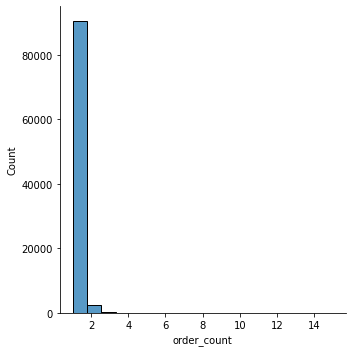

In [27]:
# Смотрим на график распределения количества покупок среди пользователей.
sns.displot(data = total_orders_per_user, x='order_count')

In [28]:
total_orders_per_user.sort_values('order_count', ascending = False)

,customer_unique_id,order_count
51426,8d50f5eadf50201ccdcedfb9e2ac8455,15
22779,3e43e6105506432c953e165fb2acf44c,9
36705,6469f99c1f9dfae7733b25662e7f1782,7
73911,ca77025e7201e3b30c44b472ff346268,7
10060,1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...,...
31559,5656a8fabc8629ff96b2bc14f8c09a27,1
31558,56560124a5cc70119deb685775639ea7,1
31557,5655ee330a79bd1fd1e5fb220c2436dd,1
31556,5655967ad654dc2d2affca3502631db7,1


In [29]:
#Считаем сколько пользователей совершили одну покупку
total_orders_per_user.query('order_count == 1').agg({'customer_unique_id': 'count'})

customer_unique_id    90545
dtype: int64

__Вывод №1:__ 90545 пользователей совершили только одну покупку.

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?


In [30]:
# Выбираем данные, где заказы не доставлены
undelivered_orders_ = orders_.loc[orders_.order_delivered_customer_date.isnull()]

Для ранжирования причин недоставки товара анализирую столбец `order_status`.
Берем за недоставленные заказы все в которых ожидаемая дата доставки меньше максимальной даты заказа в датасете.
Для понимания на каком этапе застряло продвижение нашего товара у клиента:

 - `invoiced` - счет не был оплачен клиентом;
 - `approved` —  заказ был подтверждён, но информация не передана для сборки. Баг в системе;
 - `shipped` —  товар был отгружен со склада, ошибка логистики. По скольку имеется дата передачи курьером, заказ утерен при транспортировке;
 - `unavailable` - заказ не доступен, нет наличия на складе (у поставщика);
 - `processing` —  заказ застрял на этапе сборке, проблема со стороны склада.
 
 Для подготовки данных удалим данные: 
 - с отмененными заказами `canceled`, потому что заказ не доставлен по причине отказа клиента. Анализ данной информации не относятся к проблемам доставки;
 - со статусом `delivered`, примем допущение, что отсутствие даты доставки в базе данных связано с техническими причинами. Изменение статуса и подтверждение даставки, происходит иным способом. Например, подпись клиента на бланке.

In [31]:
undelivered_orders_.order_status.unique()

array(['invoiced', 'shipped', 'processing', 'unavailable', 'canceled',
       'delivered', 'approved'], dtype=object)

In [32]:
undelivered_orders_.shape

(2819, 12)

In [33]:
# выбираем данные где ожидаемый срок доставки уже превышен.
#В качесте точки отсчета берем максимальную дату в данных.
# удаляем отмененные и доставленные заказы
# Удаляем неполные месяцы из данных
undelivered_orders = undelivered_orders_[(undelivered_orders_['order_estimated_delivery_date']>='2016-10-01')&(undelivered_orders_['order_estimated_delivery_date']<'2018-10-01')]\
                                        .loc[~(undelivered_orders_.order_status == 'canceled')]\
                                        .loc[~(undelivered_orders_.order_status == 'delivered')]

In [34]:
undelivered_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,c7f8d7b1fffc946d7069574f74c39f4e,88140,santo amaro da imperatriz,SC


In [35]:
undelivered_orders.order_status.unique()

array(['invoiced', 'shipped', 'processing', 'unavailable', 'approved'],
      dtype=object)

In [36]:
undelivered_orders.shape


(2333, 12)

In [37]:
#устанавливаем индекс на колонку с предварительной датой доставки
undelivered_orders = undelivered_orders.set_index('order_estimated_delivery_date')

In [38]:
#Считаем сколько всего недоставленных заказов по разным причинам:
undelivered_orders_status = undelivered_orders.groupby('order_status').agg({'order_id': 'count'}).rename(columns={'order_id': 'count_orders'})

In [39]:
# Делим общее число недоставленных заказов по разным причинам на количество полных месяцев в датасете,
# а именно 22(так как вычли неполный сентябрь 2016 и октябрь 2018)
undelivered_orders_status['undelivered_by_month'] = (undelivered_orders_status['count_orders']/22).round()

In [40]:
undelivered_orders_status

,count_orders,undelivered_by_month
order_status,,
approved,2,0.0
invoiced,314,14.0
processing,301,14.0
shipped,1107,50.0
unavailable,609,28.0


 __Вывод №2:__
В ходе расчетов и предварительных допущений в месяц в среднем не доставляется:

- `0` подтверждённых заказов, информация по которым не передана для сборки (возможный баг в системе)(всего в дата сете - 2 раза) 
- `14` не оплаченных клиентом заказов;
- `14` заказов застрявших на этапе сборке, проблема со стороны склада;

- `50` отгруженых со склада, но утеренных при транспортировке заказов;

- `28` не доступных для заказа товаров, нет наличия на складе (у поставщика);

- `14` заказов застрявших на этапе сборки,по причине проблемы со стороны склада.

3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [41]:
#обьядиняем таблицу с доставленными заказами и товарами
all_sales = delivered_orders.merge(order_items, how = 'inner', on = 'order_id')

In [42]:
# устанавливаем индекс на покупку
all_sales = all_sales.reset_index()

In [116]:
all_sales

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,...,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,weekday,wd
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,...,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday,1
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,...,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Tuesday,2
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,...,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday,3
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,...,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday,6
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,...,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110177,110177,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,...,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,Tuesday,2
110178,110178,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,...,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,Sunday,7
110179,110179,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,...,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday,1
110180,110180,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,...,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday,1


In [43]:
# Расчитываем количество уникальных проданных товаров
all_sales.product_id.nunique()

32213

In [44]:
# Добавляем столбец с днем недели
all_sales['weekday'] = all_sales['order_purchase_timestamp'].apply(lambda x: x.day_name())
all_sales['wd'] = all_sales['order_purchase_timestamp'].apply(lambda x: x.isoweekday())

In [45]:
# Cчитаем продажи товаров по дням недели
product_by_weekday = all_sales.groupby(['product_id', 'weekday'], as_index = False).agg({'order_id':'count'}).sort_values(['product_id','order_id'], ascending = [True, False])

In [46]:
# Оставляем только дни недели с максимальным количеством проданных заказов
product_by_weekday_max = product_by_weekday.groupby("product_id", group_keys=False).apply(lambda x: x.nlargest(1, "order_id")).sort_values('order_id', ascending = False)

In [47]:
product_by_weekday_max

,product_id,weekday,order_id
15594,422879e10f46682990de24d770e7f83d,Wednesday,93
35745,99a4788cb24856965c36a24e339b6058,Monday,91
40177,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
19707,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
12742,368c6c730842d78016ad823897a372db,Friday,67
...,...,...,...
23173,62a5a3de0af802fb3718a83c74c3ff8d,Sunday,1
23172,62a183c5f3895060ba1a8f1415694908,Friday,1
23171,62a068fa5b6d1cb8015c754504a10bfa,Thursday,1
23159,629beb8e7317703dcc5f35b5463fd20e,Saturday,1


__Вывод №3:__ Мы видим что число строк в таблице совпадает с количеством уникальных проданных товаров, следовательно, наша таблица отвечает на вопрос в какой день недели чаще всего продавался товар.

Данный таблица, отвечает на поставленный вопрос, но не дает общего понимания по продажам товаров. Поэтому проанализируем общее число продажи товаров.

In [48]:
product_sales = all_sales.groupby("product_id", as_index = False)\
                         .agg({'order_id':'count'})\
                         .rename(columns = {'order_id': 'count_orders'})

In [49]:
product_sales.groupby('count_orders', as_index = False)\
             .agg({'product_id':'count'})\
             .rename(columns = {'product_id': 'count_products'})\
             .sort_values('count_products', ascending = False)

,count_orders,count_products
0,1,17716
1,2,5666
2,3,2607
3,4,1494
4,5,971
...,...,...
104,134,1
105,137,1
106,138,1
107,139,1


In [50]:
sales_by_weekday = all_sales.groupby(['weekday', 'wd'], as_index = False)\
         .agg({'product_id':'count'})\
         .sort_values('wd')\
         .rename(columns = {'product_id': 'count_products'})
         

In [51]:
sales_by_weekday

,weekday,wd,count_products
1,Monday,1,17973
5,Tuesday,2,17858
6,Wednesday,3,17219
4,Thursday,4,16432
0,Friday,5,15695
2,Saturday,6,11876
3,Sunday,7,13129


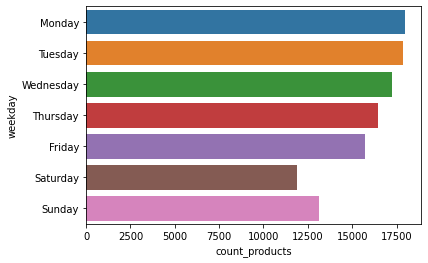

In [52]:
sns.barplot(data = sales_by_weekday, y = 'weekday', x = 'count_products')

Итак, проведя дополнительное исследование мы выяснили, что большинство продуктов за данный период купили только один раз. А также построили график распределения количества проданных продуктов по дням недели, то есть в понедельник продается больше всего единиц товаров.

__4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.__

Большинство наших пользователей (90545 чел.) за два года совершили покупку только один раз, поэтому для расчета среднего количества покупок в неделю по месяцам примем следующие допущения:
 
 - уберем из наших данных, пользователей совершивших только одну покупку, расчет средних метрик для этих пользователей не является показательным (средние покупки в неделю будут стремиться к нулю);
 - будем рассматривать среднее за неделю только в тех месяцах, когда вообще была совершена хотя бы одна покупка.

In [53]:
# Выбираем только пользователей совершивших больше одной покупки
returned_customers = total_orders_per_user.customer_unique_id.loc[total_orders_per_user.order_count >1]

In [54]:
# Оставляем в датасете только пользователей совершивших больше одной покупки
df_returned_custumers = delivered_orders.loc[delivered_orders.customer_unique_id.isin(returned_customers)]

In [55]:
# Оставляем только нужные для рассмотрения столбцы
df_4 = df_returned_custumers[['customer_unique_id', 'order_id', 'order_purchase_timestamp' ]]

In [56]:
df_4

,customer_unique_id,order_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
15,ccafc1c3f270410521c3c6f3b249870f,dcb36b511fcac050b97cd5c05de84dc3,2018-06-07 19:03:12
16,6e26bbeaa107ec34112c64e1ee31c0f5,403b97836b0c04a622354cf531062e5f,2018-01-02 19:00:43
46,c2551ea089b7ebbc67a2ea8757152514,d17dc4a904426827ca80f2ccb3a6be56,2017-05-14 20:28:25
58,51838d41add414a0b1b989b7d251d9ee,a685d016c8a26f71a0bb67821070e398,2017-03-13 18:14:36
...,...,...,...
99136,e2492e4188991b6276a4a62a287a5451,a96157730ca02d9de4c4e4ac2fc49f2c,2018-02-06 08:38:54
99148,62b8761192c86f4ead06f4a433096a2b,58edf3f5f282ab91e0f6a6f2b85af02a,2018-05-07 09:01:58
99185,dca9a13536adcef18c6c5859487347b1,bfecb4ee6ab98bff69307aab578db48a,2018-03-17 12:52:37
99259,39fff7cb5873a7116b02234bd1e6c6dc,1b4a0e6b19d0034b531655b41ea89623,2017-10-02 08:45:35


In [57]:
# Убираем неполные месяцы
df_4 = df_4[(df_4['order_purchase_timestamp']>='2016-10-01')&(df_4['order_purchase_timestamp']<'2018-10-01')]

In [58]:
# Устанавливаем индекс на колонку с временем покупки
df_4 = df_4.set_index('order_purchase_timestamp')

In [59]:
# Считаем количество покупок за календарный месяц
df_4_ = df_4.groupby('customer_unique_id').resample('M').size().reset_index().rename(columns = {0:'number_of_orders'})

In [60]:
df_4_

,customer_unique_id,order_purchase_timestamp,number_of_orders
0,004288347e5e88a27ded2bb23747066c,2017-07-31,1
1,004288347e5e88a27ded2bb23747066c,2017-08-31,0
2,004288347e5e88a27ded2bb23747066c,2017-09-30,0
3,004288347e5e88a27ded2bb23747066c,2017-10-31,0
4,004288347e5e88a27ded2bb23747066c,2017-11-30,0
...,...,...,...
10949,ff922bdd6bafcdf99cb90d7f39cea5b3,2017-06-30,0
10950,ff922bdd6bafcdf99cb90d7f39cea5b3,2017-07-31,0
10951,ff922bdd6bafcdf99cb90d7f39cea5b3,2017-08-31,1
10952,ff922bdd6bafcdf99cb90d7f39cea5b3,2017-09-30,1


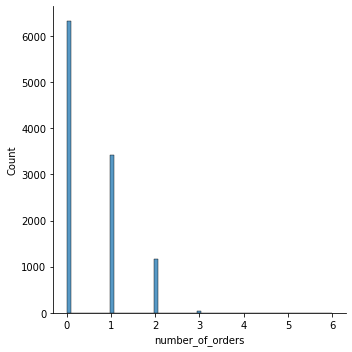

In [61]:
# Смотрим на распределения кольчества покупок в месяц, где покупки совершались.
sns.displot(df_4_, x='number_of_orders')

In [62]:
# Убираем месяцы с нулевым количеством покупок
df_4_not_null = df_4_.loc[df_4_.number_of_orders > 0]

In [63]:
# Создаем колонку количество дней в месяце
df_4_not_null = df_4_not_null.assign(days_in_month = df_4_not_null['order_purchase_timestamp'].apply(lambda x: x.days_in_month))

In [64]:
# Создаем колонку количество недель в месяце
df_4_not_null = df_4_not_null.assign(weeks = df_4_not_null['days_in_month']/7)

In [65]:
# Считаем среднее количество покупок в неделю в месяцах когда была совершена хотя бы одна покупка
df_4_not_null = df_4_not_null.assign(avg_week_purchases = df_4_not_null['number_of_orders']/df_4_not_null['weeks'])

In [66]:
# Для удобства создаем колонку с названиями месяцев
df_4_not_null = df_4_not_null.assign(month = df_4_not_null['order_purchase_timestamp'].apply(lambda x: x.month_name()))

In [67]:
# Для удобства создаем колонку с годом и сортируем данные по датам
df_4_not_null = df_4_not_null.assign(year = df_4_not_null['order_purchase_timestamp'].dt.year).sort_values(['customer_unique_id', 'order_purchase_timestamp'])

In [68]:
# Оставляем только нужные для анализа столбцы
df_avg_week_purchases = df_4_not_null[['customer_unique_id', 'month', 'year', 'avg_week_purchases']]

In [69]:
df_avg_week_purchases

,customer_unique_id,month,year,avg_week_purchases
0,004288347e5e88a27ded2bb23747066c,July,2017,0.225806
6,004288347e5e88a27ded2bb23747066c,January,2018,0.225806
7,00a39521eb40f7012db50455bf083460,May,2018,0.225806
8,00a39521eb40f7012db50455bf083460,June,2018,0.233333
9,00cc12a6d8b578b8ebd21ea4e2ae8b27,March,2017,0.451613
...,...,...,...,...
10944,ff8892f7c26aa0446da53d01b18df463,November,2017,0.233333
10945,ff922bdd6bafcdf99cb90d7f39cea5b3,February,2017,0.250000
10951,ff922bdd6bafcdf99cb90d7f39cea5b3,August,2017,0.225806
10952,ff922bdd6bafcdf99cb90d7f39cea5b3,September,2017,0.233333


In [70]:
# Дополнитеотно отсортируем наши данные чтоб посмотреть на топ покупателей.
df_avg_week_purchases.sort_values('avg_week_purchases', ascending = False)

,customer_unique_id,month,year,avg_week_purchases
796,12f5d6e1cbf93dafd9dcc19095df0b3d,January,2017,1.354839
7796,b4e4f24de1e8725b74e4a1f4975116ed,February,2018,1.000000
7090,a239b8e2fbce33780f1f1912e2ee5275,February,2017,1.000000
2575,3e43e6105506432c953e165fb2acf44c,February,2018,1.000000
7647,b08fab27d47a1eb6deda07bfd965ad43,September,2017,0.933333
...,...,...,...,...
5200,7a114c4d600e1eb56f331eba875d38a6,January,2018,0.225806
5202,7a114c4d600e1eb56f331eba875d38a6,March,2018,0.225806
5205,7a1de9bde89aedca8c5fbad489c5571c,August,2017,0.225806
5209,7a1de9bde89aedca8c5fbad489c5571c,December,2017,0.225806


__Вывод №4:__
Наша итоговая таблица df_avg_week_purchases показывает среднее количество покупок в неделю в месяца когда покупки были совершены, для каждого пользователя. Отсортировав ее по покупкам, мы видем топ лояльных пользователей и месяца в которые они совершали больше всего покупок.

Данная метрика, по моему мнению, не подходит особенностям данного интернет магазина. Покупки совершаются недостаточно часто, чтоб рассматривать среднее значение покупок в неделю.

__5.1  Выполните когортный анализ пользователей.__

5.2 В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц. Описание подхода можно найти тут. Для визуализации когортной таблицы рекомендуем использовать пример из 8-го урока python, раздел “Стильный урок”, степ 5. (15 баллов)

In [71]:
# Находим дату совершения пользователем первой покупки
users = delivered_orders.groupby('customer_unique_id', as_index = False).agg({'order_purchase_timestamp':'min'})

In [72]:
# Добавляем столбец с месяцем совершения первой покупки
users['reg_month'] = users['order_purchase_timestamp'].astype('datetime64[M]')

In [73]:
users.head(3)

,customer_unique_id,order_purchase_timestamp,reg_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-01
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-01
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-01


In [74]:
# Добавляем столбец месяц покупки в таблицу с доставленными заказами 
delivered_orders['purchase_month'] = delivered_orders['order_purchase_timestamp'].astype('datetime64[M]')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
delivered_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,purchase_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08-01


In [76]:
# Найдем границы временного интервала по месяцам, когда были совершены покупки
min_date = delivered_orders['purchase_month'].min() 
max_date = delivered_orders['purchase_month'].max()

In [77]:
# Создаем вспомогательную таблицу с месяцами, когда были совершены покупки
month = pd.DataFrame(pd.date_range(min_date,max_date,freq='MS'))

In [78]:
# Переименовываем название столбца
month.columns = ['purchase_month']

In [79]:
month.head()

,purchase_month
0,2016-09-01
1,2016-10-01
2,2016-11-01
3,2016-12-01
4,2017-01-01


In [80]:
# Добавляем ключи по которым будем кроссджойнить таблицы
month['key'] = 1

In [81]:
users['key'] = 1

In [82]:
# Объединяем таблицы по ключу и оставляем только нужные столбцы
tamplate = users.merge(month, on = 'key')[['customer_unique_id', 'reg_month', 'purchase_month' ]]

In [83]:
# Оставляем только строчки где дата покупки больше или равна дате регистрации
tamplate = tamplate[tamplate['purchase_month'] >= tamplate['reg_month']]

In [84]:
# Получается таблица, где к каждому пользователю присоеденены все месяца, после его первой покупки.
tamplate

,customer_unique_id,reg_month,purchase_month
20,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-05-01
21,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-06-01
22,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-07-01
23,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-08-01
44,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,2018-05-01
...,...,...,...
2240275,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-04-01
2240276,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-05-01
2240277,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-06-01
2240278,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-07-01


In [85]:
# Считаем для каждого пользователя количество покупок в месяцах
purch_month = delivered_orders.groupby(['customer_unique_id','purchase_month'])['order_id'].size().reset_index()

In [86]:
# Переименовываем колонки
purch_month.columns = ['customer_unique_id', 'purchase_month', 'number_of_orders']

In [87]:
purch_month

,customer_unique_id,purchase_month,number_of_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1
2,0000f46a3911fa3c0805444483337064,2017-03-01,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1
...,...,...,...
95175,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,1
95176,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,1
95177,ffff371b4d645b6ecea244b27531430a,2017-02-01,1
95178,ffff5962728ec6157033ef9805bacc48,2018-05-01,1


In [109]:
# Объединяем таблицы с шаблоном и с количеством покупок по месяцам
report = tamplate.merge(purch_month, on = ['customer_unique_id', 'purchase_month'], how = 'left')

In [110]:
# Добавляем столбец об активности пользователя
report['active'] = (report.number_of_orders >0)*1

In [111]:
# Добавляем столбец с нумерацией месяцев от первой покупки
report['lifetime'] = ((report['purchase_month']-report['reg_month'])/np.timedelta64(1, 'M')).round().astype(int)

In [112]:
# Создаем сводную таблицу по месяцам от первой покупки
retention = report.pivot_table(index = 'reg_month', columns = 'lifetime', values = 'active', aggfunc='mean')

In [113]:
# визуализируем расчеты
ur_style = (retention
            .style
            .set_caption('User retention by cohort')  # добавляем подпись
            .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
reg_month,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:00:00,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2016-10-01 00:00:00,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.38%,0.00%,0.00%,0.38%,0.00%,0.38%,0.00%,0.38%,0.00%,0.38%,0.00%,0.38%,0.00%,0.76%,0.76%,0.00%,0.00%,
2016-12-01 00:00:00,100.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,,,
2017-01-01 00:00:00,100.00%,0.28%,0.28%,0.14%,0.42%,0.14%,0.42%,0.14%,0.14%,0.00%,0.42%,0.14%,0.70%,0.42%,0.14%,0.14%,0.28%,0.42%,0.00%,0.14%,,,,
2017-02-01 00:00:00,100.00%,0.19%,0.31%,0.12%,0.43%,0.12%,0.25%,0.19%,0.06%,0.19%,0.12%,0.31%,0.12%,0.19%,0.12%,0.06%,0.06%,0.19%,0.00%,,,,,
2017-03-01 00:00:00,100.00%,0.44%,0.36%,0.40%,0.36%,0.16%,0.16%,0.32%,0.32%,0.08%,0.36%,0.12%,0.20%,0.12%,0.16%,0.24%,0.08%,0.12%,,,,,,
2017-04-01 00:00:00,100.00%,0.62%,0.22%,0.18%,0.27%,0.27%,0.35%,0.31%,0.31%,0.18%,0.27%,0.09%,0.04%,0.04%,0.09%,0.09%,0.13%,,,,,,,
2017-05-01 00:00:00,100.00%,0.46%,0.46%,0.29%,0.29%,0.32%,0.41%,0.14%,0.26%,0.26%,0.26%,0.35%,0.23%,0.03%,0.17%,0.20%,,,,,,,,
2017-06-01 00:00:00,100.00%,0.49%,0.40%,0.43%,0.30%,0.40%,0.36%,0.23%,0.13%,0.20%,0.30%,0.36%,0.16%,0.16%,0.23%,,,,,,,,,


In [114]:
# Создаем сводную таблицу только для пользователей пришедших в 2017 году
retention_2017 = report[(report['reg_month'] >= '2017-01-01') & (report['reg_month'] < '2018-01-01')].pivot_table(index='reg_month',columns='lifetime',values='active',aggfunc='mean')

In [115]:
ur_style = (retention_2017
            .style
            .set_caption('User retention by cohort')  # добавляем подпись
            .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
reg_month,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,100.00%,0.28%,0.28%,0.14%,0.42%,0.14%,0.42%,0.14%,0.14%,0.00%,0.42%,0.14%,0.70%,0.42%,0.14%,0.14%,0.28%,0.42%,0.00%,0.14%
2017-02-01 00:00:00,100.00%,0.19%,0.31%,0.12%,0.43%,0.12%,0.25%,0.19%,0.06%,0.19%,0.12%,0.31%,0.12%,0.19%,0.12%,0.06%,0.06%,0.19%,0.00%,
2017-03-01 00:00:00,100.00%,0.44%,0.36%,0.40%,0.36%,0.16%,0.16%,0.32%,0.32%,0.08%,0.36%,0.12%,0.20%,0.12%,0.16%,0.24%,0.08%,0.12%,,
2017-04-01 00:00:00,100.00%,0.62%,0.22%,0.18%,0.27%,0.27%,0.35%,0.31%,0.31%,0.18%,0.27%,0.09%,0.04%,0.04%,0.09%,0.09%,0.13%,,,
2017-05-01 00:00:00,100.00%,0.46%,0.46%,0.29%,0.29%,0.32%,0.41%,0.14%,0.26%,0.26%,0.26%,0.35%,0.23%,0.03%,0.17%,0.20%,,,,
2017-06-01 00:00:00,100.00%,0.49%,0.40%,0.43%,0.30%,0.40%,0.36%,0.23%,0.13%,0.20%,0.30%,0.36%,0.16%,0.16%,0.23%,,,,,
2017-07-01 00:00:00,100.00%,0.53%,0.35%,0.24%,0.29%,0.21%,0.32%,0.11%,0.19%,0.27%,0.21%,0.29%,0.13%,0.24%,,,,,,
2017-08-01 00:00:00,100.00%,0.69%,0.35%,0.27%,0.35%,0.52%,0.30%,0.27%,0.15%,0.15%,0.25%,0.20%,0.12%,,,,,,,
2017-09-01 00:00:00,100.00%,0.70%,0.55%,0.27%,0.45%,0.22%,0.22%,0.25%,0.27%,0.17%,0.25%,0.07%,,,,,,,,


__Вывод №5:__

5.1. Для выполнения 5 пункта мы провели кагортный анализ пользователей, разделили всех пользователей на группы по месяцу совершения их первой покупки и посмотрели на их поведение с течением времени. Возврат пользователей в последующие месяцы меньше 1%. Наблюдаются проблемы с удержанием клиентов. Это значительная проблема, учитывая что малую стоимость товаров. т.е. мы не продаем премиальные или дорогие товары, которые пользователи покупают редко.

5.2. Для ответа на этот пункт, мы ограничили таблицу только теми пользователями, которые зарегистрировались в 2017 году. Таким образом с января по декабрь самым высоким retention на третий месяц обладает кагорта пользователей, зарегистрировавшихся в `июне 2017 года`.


6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (23 балла)

In [117]:
# Оставим только нужные для подсчета столбцы в таблице
df_all_sales = all_sales[['customer_unique_id', 'order_id', 'order_purchase_timestamp', 'price']]

In [118]:
#Число уникальных доставленных заказов, для проверки, что не потеряли
delivered_orders.order_id.nunique()

96464

In [119]:
df_all_sales = df_all_sales.groupby(['customer_unique_id', 'order_id', 'order_purchase_timestamp'], as_index = False).agg({'price':'sum'})

In [120]:
df_all_sales

,customer_unique_id,order_id,order_purchase_timestamp,price
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 10:56:27,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 11:11:27,18.90
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:29:41,25.99
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 19:45:42,180.00
...,...,...,...,...
96459,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08 21:00:36,1570.00
96460,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10 20:07:56,64.89
96461,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-07 15:49:16,89.90
96462,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02 15:17:41,115.00


In [121]:
#Устанавливаем значение времени для симуляции ситуации, что анализ данных происходит на следующий день от получения их.
NOW = df_all_sales['order_purchase_timestamp'].max() + timedelta(days=1)
NOW

Timestamp('2018-08-30 15:00:37')

In [122]:
# Добавим столбец с количеством дней между покупкой и текущим моментом. 
df_all_sales['days_since_order'] = df_all_sales['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)

In [123]:
# Создаем словарь для агрегации данных
aggr = {
    'days_since_order': lambda x: x.min(),  # количество дней с последней покупки (Recency)
    'order_purchase_timestamp': lambda x: len([d for d in x ]), # общее количество заказов за указанный период (Frequency)
}
# Группируем таблицу по пользователям
rfm = df_all_sales.groupby('customer_unique_id').agg(aggr).reset_index()
# Переименовываем колонки
rfm.rename(columns={'days_since_order': 'recency', 'order_purchase_timestamp': 'frequency'}, inplace=True)
rfm.head()

,customer_unique_id,recency,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1
2,0000f46a3911fa3c0805444483337064,537,1
3,0000f6ccb0745a6a4b88665a16c9f078,321,1
4,0004aac84e0df4da2b147fca70cf8255,288,1


In [124]:
# Агрегируем стоимость покупок по пользователю
df_mon = df_all_sales.groupby('customer_unique_id', as_index = False).agg({'price':'sum'})

In [125]:
# Мерджим с таблицей rfm
rfm =rfm.merge(df_mon, how = 'left', on = 'customer_unique_id')

In [126]:
rfm = rfm.rename(columns = {'price': 'monetary'})

In [127]:
rfm

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00
...,...,...,...,...
93340,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,1570.00
93341,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89
93342,ffff371b4d645b6ecea244b27531430a,568,1,89.90
93343,ffff5962728ec6157033ef9805bacc48,119,1,115.00


In [128]:
# Определяем квантили для последующей оценки
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 92.0, 0.4: 177.0, 0.6: 268.0, 0.8: 382.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [129]:
# Создаем функции ранжирования

def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

In [130]:
# Присваиваем оценки
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [131]:
# Объединяем оценки в RFM Score
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,5,215


На основе оценок R и F я выделила 4 сегмента пользователей:

`hibernating` - покупали давно и мало, спящие либо ушедшие пользователи;

`at risk` - покупали давно и много, требуют внимания (найти причины оттока);

`loyal customers` - покупали недавно и много, лояльные пользователи;

`new customers` - покупали недавно и немного, новые пользователи.

In [132]:

segt_map = {
    r'[1-3][1-2]': 'hibernating',
    r'[1-2][3-5]': 'at risk',
    r'[3-5][3-5]': 'loyal customers',
    r'[4-5][1-2]': 'new customers'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,4,414,new customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,4,1,1,411,new customers
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2,112,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211,hibernating
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,5,215,hibernating


In [133]:
customers_by_segments = rfm['Segment'].value_counts().sort_values(ascending=True)


In [134]:
customers_by_segments

at risk              987
loyal customers     1813
new customers      36224
hibernating        54321
Name: Segment, dtype: int64

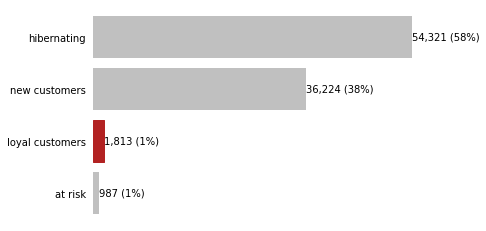

In [136]:
fig, ax = plt.subplots()

bars = ax.barh(range(len(customers_by_segments)),
              customers_by_segments,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(customers_by_segments)))
ax.set_yticklabels(customers_by_segments.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if customers_by_segments.index[i] in ['loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/customers_by_segments.sum())),
                va='center',
                ha='left'
               )

plt.show()

__Вывод №6:__

Мы построили RFM -сегментацию наших пользователей и подтвердили наши предположения, что в приложении большенство пользователей совершает мало покупок (в визуализации отсутствуют лояльные пользователи, а также пользователи совершавшие много покупок в прошлом). Однако наблюдается большой сегмент новых пользователей, следует изучить причины оттока покупателей и продумать способы их удержания и повышения активности.